In [24]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np


print(torch.__version__)
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

1.0.1.post2
Populating the interactive namespace from numpy and matplotlib


In [41]:

 
# We will look at stock prices over the past year, starting at January 1, 2016
start = (2000, 12, 1)
start = datetime.datetime(*start)
end = datetime.date.today()

google = pdr.DataReader('028050.KS', 'yahoo', start, end)

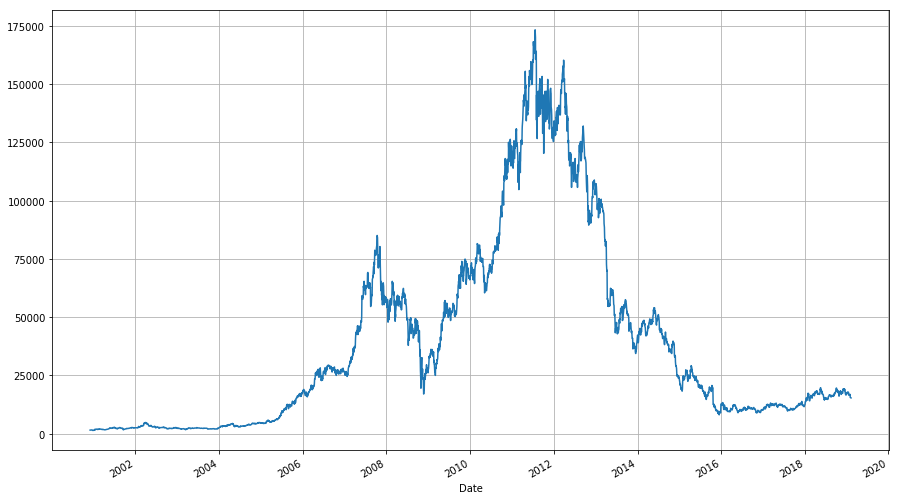

In [42]:
google.Low.plot(grid=True)

In [48]:
google.tail()
i = 50
a = google.iloc[100:200]
a = a.apply(lambda x: (x-x[i]) /  x[i])
a

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-05-09,-0.108582,-0.096954,-0.085875,-0.092162,0.260251,-0.092162
2001-05-10,-0.105901,-0.099725,-0.094183,-0.097661,0.255696,-0.097661
2001-05-11,-0.117962,-0.103879,-0.099725,-0.099039,0.255696,-0.099039
2001-05-14,-0.080431,-0.092800,-0.092800,-0.067400,1.235194,-0.067400
2001-05-15,-0.061663,-0.062329,-0.058171,-0.064648,1.124715,-0.064648
2001-05-16,-0.044238,-0.059558,-0.059558,-0.039890,2.927108,-0.039891
2001-05-17,-0.012066,-0.023546,-0.005542,-0.006877,2.083145,-0.006877
2001-05-18,0.026809,-0.013850,-0.002771,0.045390,4.139523,0.045390
2001-05-21,0.104558,0.078946,0.078946,0.094909,5.335424,0.094909


In [75]:
class StockDataset(Dataset):
    
    def __init__(self, symbol, x_frames, y_frames, start, end):
        
        self.symbol = symbol
        self.x_frames = x_frames
        self.y_frames = y_frames
        
        self.start = datetime.datetime(*start)
        self.end = datetime.datetime(*end)

        self.data = pdr.DataReader(self.symbol, 'yahoo', self.start, self.end)
        
    def __len__(self):
        return len(self.data) - (self.x_frames + self.y_frames) + 1
    
    def __getitem__(self, idx):
        idx += self.x_frames
        print(idx)
        print(idx-self.x_frames)
        data = self.data.iloc[idx-self.x_frames:idx+self.y_frames]
        data = data[['High', 'Low', 'Open', 'Close', 'Adj Close', 'Volume']]
        data = data.apply(lambda x: (x-x[self.x_frames]) / x[self.x_frames])

        return data.values
        

In [76]:
dataset = StockDataset('028050.KS', 5, 5, (2000,2,1), (2019, 2,1))

In [77]:
print(dataset[0].shape)

5
0
(10, 6)
